<a href="https://colab.research.google.com/github/xav1221/segmentation-d-image/blob/main/Segmentation_d_objets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

currently running on: cpu


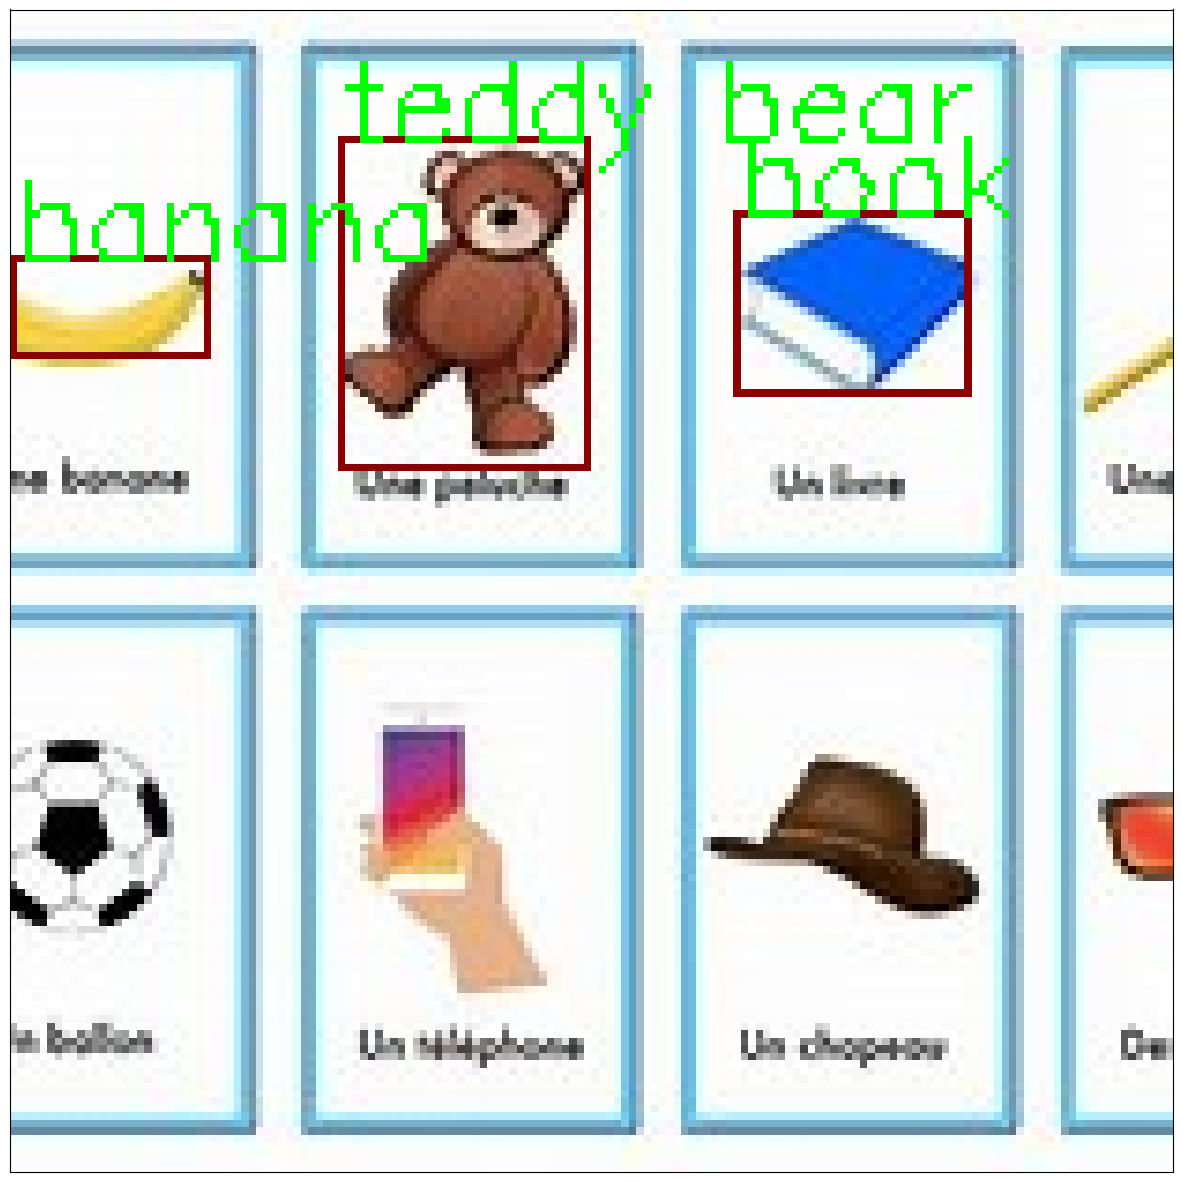

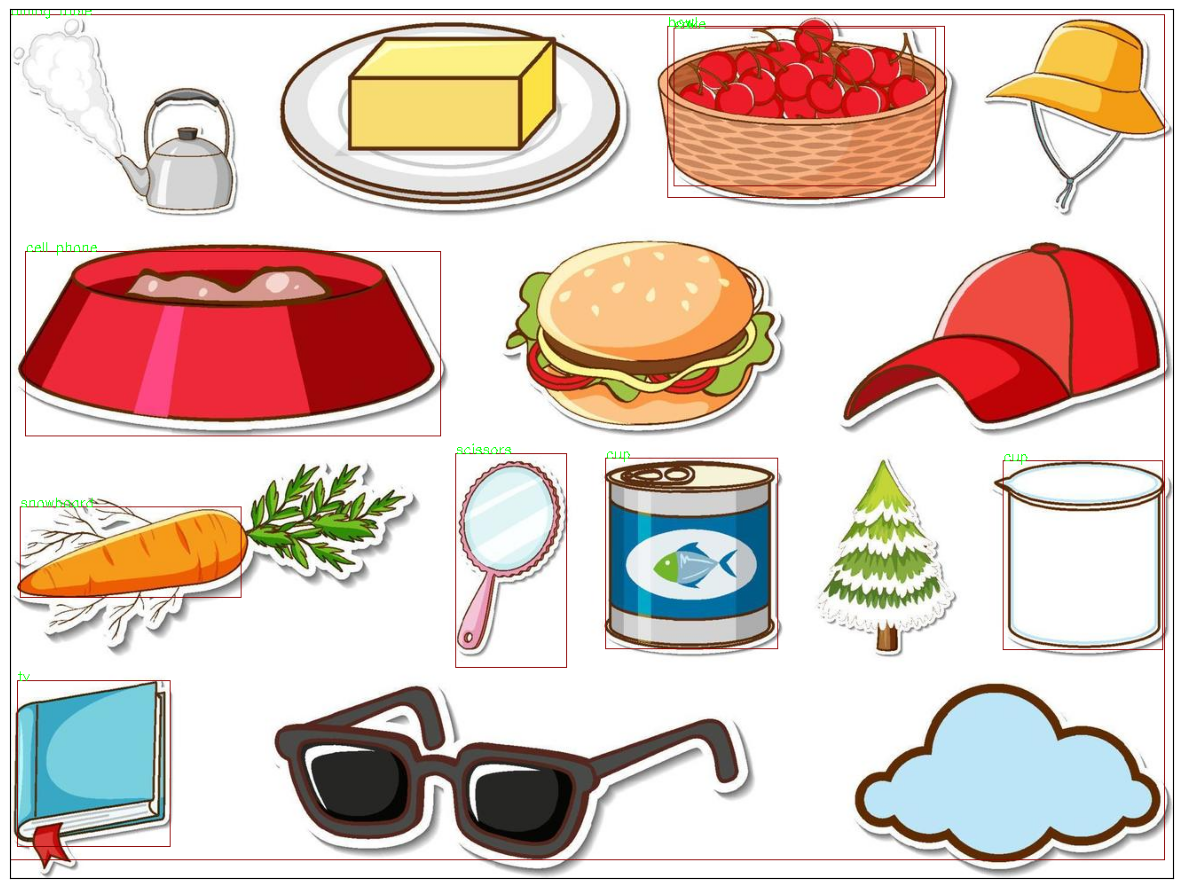

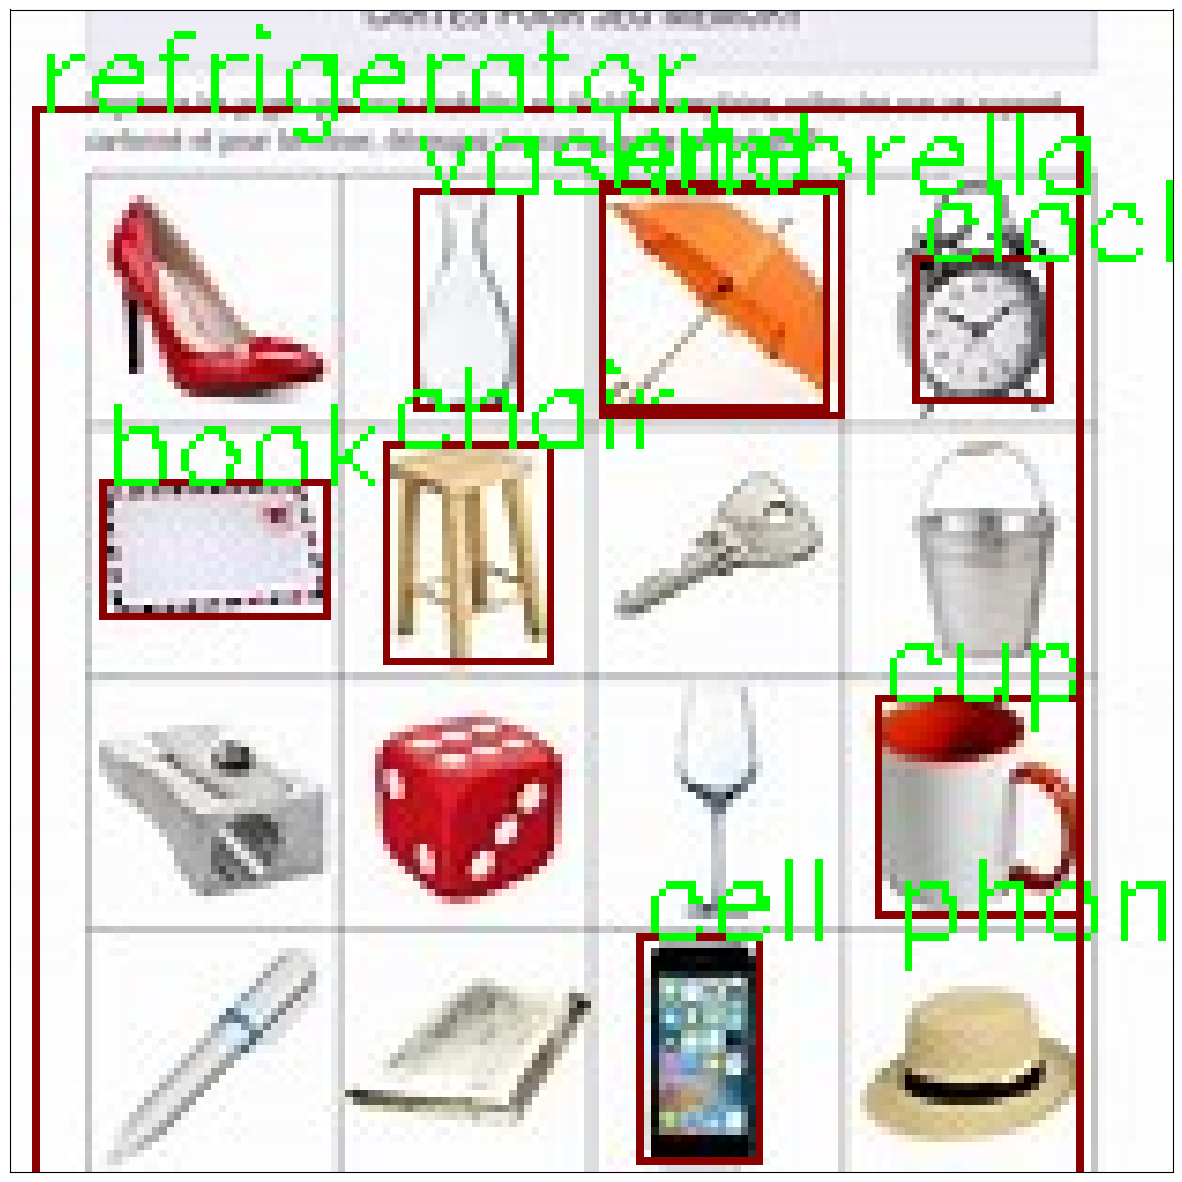

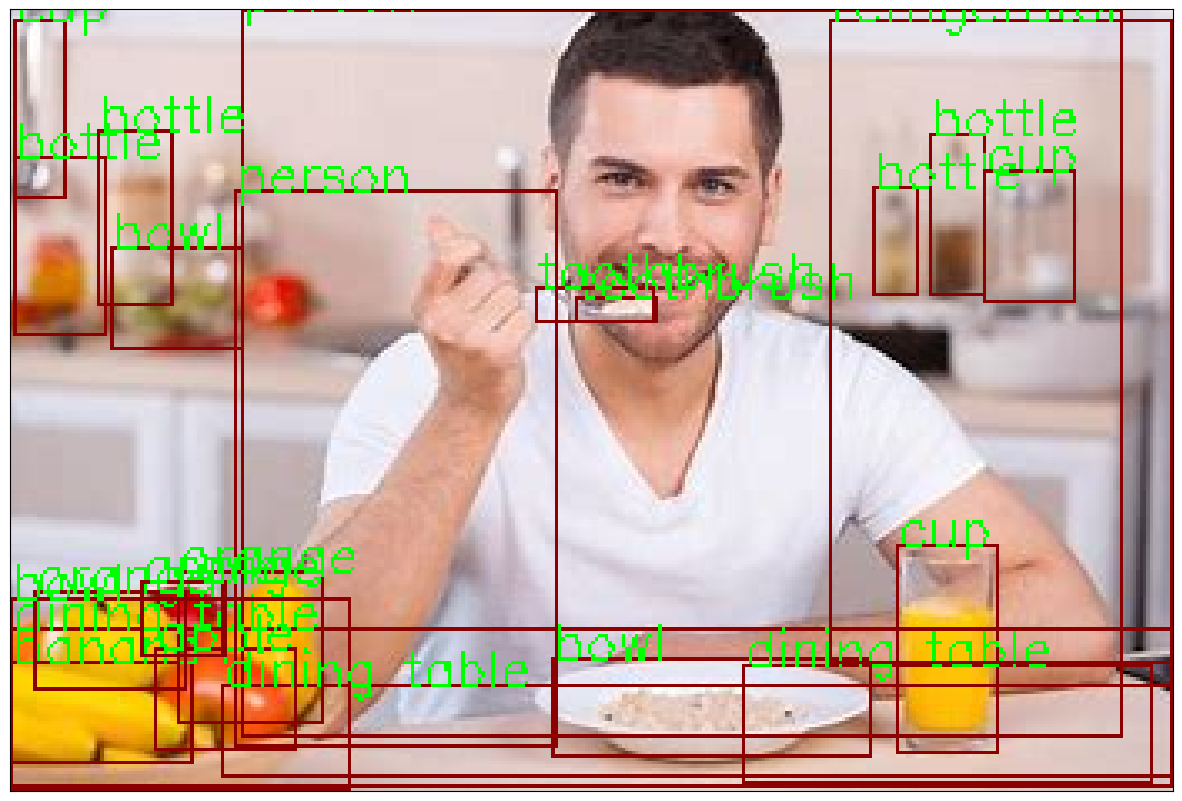

In [16]:
#!/usr/bin/env python
# coding: utf-8

# imports
import torchvision
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as T
from PIL import Image
from torch import cuda



# class definition for the used classes (from pytorch docs)
COCO_CLASSES = ['__background__', 'person', 'bicycle', 'car', 'motorcycle',
                                'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
                                'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench',
                                'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant',
                                'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella',
                                'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee',
                                'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
                                'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
                                'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife',
                                'spoon', 'bowl', 'banana', 'apple', 'sandwich',
                                'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                                'donut', 'cake', 'chair', 'couch', 'potted plant',
                                'bed', 'N/A', 'dining table', 'N/A', 'N/A',
                                'toilet', 'N/A', 'tv', 'laptop', 'mouse',
                                'remote', 'keyboard', 'cell phone', 'microwave',
                                'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
                                'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# check cuda availability
device = 'cuda' if cuda.is_available() else 'cpu'
print(f"currently running on: {device}")



def get_prediction(model, img_path, threshold):
    img = Image.open(img_path)
    transform = T.Compose([T.ToTensor()])
    img = transform(img).to(device)
    # move model to device and set to evaluation mode
    model.to(device)
    model.eval()
    pred = model([img])
    # list of predicted classes
    pred_class = [COCO_CLASSES[i]
                  for i in list(pred[0]['labels'].cpu().numpy())]
    # list of bouding boxes for each predicted item
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])]
                  for i in list(pred[0]['boxes'].cpu().detach().numpy())]
    # only return predictions with a score above threshold
    pred_score = list(pred[0]['scores'].cpu().detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    return pred_boxes, pred_class


def pipeline(model, img_path, threshold=0.3):
    boxes, pred_cls = get_prediction(model, img_path, threshold)
    img = cv2.imread(img_path)
    # Convert to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i in range(len(boxes)):
        # convert boxes to int (what opencv expects)
        boxes[i] = [list(map(int, tup)) for tup in boxes[i]]
        # Draw Rectangle with the coordinates
        cv2.rectangle(img, boxes[i][0], boxes[i][1], color=(139, 0, 0), thickness=1)
        # Write the prediction class above the rectangle
        cv2.putText(img, pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                     (0,255,0),thickness=1)
    # plot the final image with all bouding boxes
    plt.figure(figsize=(15,25))
    # display the output image
    plt.imshow(img)
    plt.xticks([]); plt.yticks([])
    plt.show()


# get model from torchvision
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)


pipeline(model, 'TEST_im1.jpg')


pipeline(model, 'TEST_im4.jpg')


pipeline(model, 'TEST_im5.jpg')


pipeline(model, 'TEST_im8.jpg')
